In [5]:
!rm -rf "/content/TaskA"
!rm -rf "/content/TaskB"
import matplotlib.pyplot as plt
from pathlib import Path
import os
import re
import shutil
import string
import tensorflow as tf
import sklearn
import numpy as np


from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from sklearn import model_selection
from tensorflow.python.keras.preprocessing import dataset_utils

In [6]:
Path("/content/TaskA").mkdir(parents=True, exist_ok=True)
Path("/content/TaskB").mkdir(parents=True, exist_ok=True)
Path("/content/Data").mkdir(parents=True, exist_ok=True)

In [7]:
#Upload the data into Data folder!!!!!
dataset=open("/content/Data/olid-training-v1.0.tsv").readlines()
testsetA=open("/content/Data/testset-levela.tsv").readlines()
testsetB=open("/content/Data/testset-levelb.tsv").readlines()

def make_directories_to_fit(path,first_label,second_label):
  paths=[]
  tr_path=path+"/Train/"
  te_path=path+"/Test/"
  tr_path_off=tr_path+first_label+"/"
  tr_path_not=tr_path+second_label+"/"
  te_path_off=te_path+first_label+"/"
  te_path_not=te_path+second_label+"/"
  paths.append(tr_path)
  paths.append(te_path)
  paths.append(tr_path_off)
  paths.append(tr_path_not)
  paths.append(te_path_off)
  paths.append(te_path_not)
  for element in paths:
    Path(element).mkdir(parents=True, exist_ok=True)
make_directories_to_fit("/content/TaskA","off","not")
make_directories_to_fit("/content/TaskB","tin","unt")

In [8]:

#Don't forget to create  txt files!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!11
#open("/content/traindata/Test/not/not.txt",'x')
#open("/content/traindata/Test/off/off.txt",'x')
#notText=open("/content/traindata/Test/not/not.txt",'w')
#offText=open("/content/traindata/Test/off/off.txt",'w')
filter='!"$%&()*+,-./:;<=>?[\]^_`{|}~\t\n'


def create_train_texts(train_path,first_label,second_label,label_index,symbol_filter,dataset):  
  for line in dataset:
    tokenized_line=tf.keras.preprocessing.text.text_to_word_sequence(line,filters=symbol_filter)
    length=len(tokenized_line)-4
    string=""
  
    if tokenized_line[length+label_index]==first_label:
      newFile=open(train_path+"/"+first_label+"/{0}.txt".format(tokenized_line[0]),'w')
      for i in range (1,length+1):
        string+=tokenized_line[i] +" "
      newFile.write(string)
      newFile.write("\n")
      newFile.close()
    elif tokenized_line[length+label_index]==second_label:
      newFile=open(train_path+"/"+second_label+"/{0}.txt".format(tokenized_line[0]),'w')
      for i in range (1,length+1):
        string+=tokenized_line[i] +" "
      newFile.write(string)
      newFile.write("\n")
      newFile.close()
   
create_train_texts("/content/TaskA/Train","off","not",1,filter,dataset)
create_train_texts("/content/TaskB/Train","tin","unt",2,filter,dataset)

In [9]:

def create_test_dictionary(path_to_csv):
  labelA=open(path_to_csv).readlines()
  header=open(path_to_csv).readline().split(',')
  dictionary_id_category={}
  for strings in labelA:
    splitted=strings.split(',')
    dictionary_id_category[splitted[0]]=splitted[1][:-1].lower()
  dictionary_id_category[header[0]]=header[1][:-1].lower()
  print(dictionary_id_category.items())
  return dictionary_id_category
dictionaryA=create_test_dictionary("/content/Data/labels-levela.csv")
dictionaryB=create_test_dictionary("/content/Data/labels-levelb.csv")


dict_items([('15923', 'off'), ('27014', 'not'), ('30530', 'not'), ('13876', 'not'), ('60133', 'off'), ('83681', 'off'), ('96874', 'not'), ('65507', 'off'), ('78910', 'not'), ('46363', 'not'), ('68123', 'not'), ('22452', 'not'), ('15565', 'not'), ('64376', 'not'), ('12588', 'off'), ('34263', 'off'), ('65773', 'not'), ('95457', 'not'), ('24930', 'not'), ('15938', 'not'), ('45712', 'not'), ('70840', 'not'), ('53563', 'not'), ('59432', 'not'), ('21454', 'not'), ('83155', 'not'), ('69576', 'not'), ('49139', 'off'), ('76669', 'not'), ('58995', 'off'), ('88490', 'off'), ('77101', 'not'), ('86917', 'not'), ('78472', 'not'), ('17798', 'not'), ('71873', 'not'), ('30247', 'not'), ('81150', 'not'), ('46444', 'off'), ('60587', 'off'), ('70569', 'off'), ('59200', 'not'), ('30900', 'not'), ('44546', 'off'), ('53982', 'not'), ('37884', 'not'), ('15079', 'not'), ('51628', 'off'), ('30899', 'off'), ('99680', 'not'), ('38628', 'not'), ('40110', 'off'), ('50310', 'not'), ('84101', 'not'), ('84876', 'not')

In [10]:
#Test values



  
def create_test_texts(test_path,first_label,second_label,dictionary,symbol_filter,dataset):
  for line in dataset:
    string=""
    tokenized_line_test=tf.keras.preprocessing.text.text_to_word_sequence(line,filters=symbol_filter)
    if dictionary.get(tokenized_line_test[0])==first_label:
    
      newFile=open(test_path+"/"+first_label+"/{0}.txt".format(tokenized_line_test[0]),'w')
      for i in range (1,len(tokenized_line_test)):
          string+=tokenized_line_test[i] +" "
      newFile.write(string)
      newFile.write("\n")
      newFile.close()
    elif dictionary.get(tokenized_line_test[0])==second_label:
      newFile=open(test_path+"/"+second_label+"/{0}.txt".format(tokenized_line_test[0]),'w')
      for i in range (1,len(tokenized_line_test)):
          string+=tokenized_line_test[i] +" "
      newFile.write(string)
      newFile.write("\n")
      newFile.close()
    elif dictionary.get(tokenized_line_test[0])==None:
      continue
    else:
      print(dictionary.get(tokenized_line_test[0]))
create_test_texts("/content/TaskA/Test","off","not",dictionaryA,filter,testsetA)     
create_test_texts("/content/TaskB/Test","tin","unt",dictionaryB,filter,testsetB)

In [11]:
#notText=open("/content/traindata/Test/not/not.txt").read()
#offText=open("/content/traindata/Test/off/off.txt").read()
batch_size = 32
seed = 228

def generate_datasets(path_to_root_folder,batch_size,seed):
  #create training
  raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(directory=
    path_to_root_folder+"/Train",labels='inferred',
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training',seed=seed)
  #create validation
  raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    path_to_root_folder+"/Train", labels='inferred',
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)  
  #create testing
  raw_test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    path_to_root_folder+"/Test", 
    batch_size=batch_size)
  return raw_train_ds,raw_val_ds,raw_test_ds

raw_train_ds,raw_val_ds,raw_test_ds=generate_datasets("/content/TaskA",batch_size,seed)
raw_train_dsB,raw_val_dsB,raw_test_dsB=generate_datasets("/content/TaskB",batch_size,seed)

for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])


for text_batch, label_batch in raw_train_dsB.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])
print("Label 0 corresponds to", raw_train_dsB.class_names[0])
print("Label 1 corresponds to", raw_train_dsB.class_names[1])

Found 13240 files belonging to 2 classes.
Using 10592 files for training.
Found 13240 files belonging to 2 classes.
Using 2648 files for validation.
Found 860 files belonging to 2 classes.
Found 4400 files belonging to 2 classes.
Using 3520 files for training.
Found 4400 files belonging to 2 classes.
Using 880 files for validation.
Found 240 files belonging to 2 classes.
Review b'@user @user are you bipolar you keep saying different shit to people commenting on what u said \n'
Label 1
Review b'@user hope they bankrupt soon \n'
Label 1
Review b'@user whenever you conservatives whine kavanaugh is being appointed fast enough all i think of is garland never getting a hearing for a year so just shhh hypocrites \n'
Label 0
Label 0 corresponds to not
Label 1 corresponds to off
Review b'@user @user @user fake conservatives and their fake outrage over the budget betrayal url url \n'
Label 0
Review b'@user whoever you are you deserve this url \n'
Label 0
Review b'@user made my wife take the eggh

In [12]:
max_features = 10000
#sequence of such length because the length of Twitter post is 280 symbols long
sequence_length = 280

def generate_vectorization_layer(max_features,sequence_length):
  return TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=int(sequence_length))
vectorize_layer = generate_vectorization_layer(max_features,sequence_length)
vectorize_layerB=generate_vectorization_layer(max_features,sequence_length)

In [13]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
train_textB=raw_test_dsB.map(lambda x,y:x)
vectorize_layer.adapt(train_text)
vectorize_layerB.adapt(train_textB)

In [14]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label
# retrieve a batch (of 32 reviews and labels) from the dataset

text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]

print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

text_batchB, label_batchB = next(iter(raw_train_dsB))
first_reviewB, first_labelB = text_batchB[0], label_batchB[0]

print("Review", first_reviewB)
print("Label", raw_train_dsB.class_names[first_labelB])
print("Vectorized review", vectorize_text(first_reviewB, first_labelB))



Review tf.Tensor(b'@user fascism of the right is fully represented by the @user and protected by the @user who hold the left to account with their threats to tax havens \n', shape=(), dtype=string)
Label not
Vectorized review (<tf.Tensor: shape=(1, 280), dtype=int64, numpy=
array([[   2, 1124,    9,    3,   82,    4, 1303, 6387,   57,    3,    2,
           8, 1737,   57,    3,    2,   47,  523,    3,  120,    5,  602,
          22,   58,  858,    5,  618,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    

In [15]:
print("7517 ---> ",vectorize_layer.get_vocabulary()[500])
print(" 1953 ---> ",vectorize_layer.get_vocabulary()[1953])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

print("7517 ---> ",vectorize_layerB.get_vocabulary()[500])
print(" 1953 ---> ",vectorize_layerB.get_vocabulary()[1953])
print('Vocabulary size: {}'.format(len(vectorize_layerB.get_vocabulary())))

7517 --->  happen
 1953 --->  votered
Vocabulary size: 10000
7517 --->  goals
 1953 --->  alive
Vocabulary size: 2014


In [16]:
def map_and_optimize(raw_train,raw_val,raw_test,vectorize_text):
  train_ds = raw_train.map(vectorize_text)
  val_ds = raw_val.map(vectorize_text)
  test_ds = raw_test.map(vectorize_text)

  #optimization
  AUTOTUNE = tf.data.AUTOTUNE

  train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
  val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
  test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
  return train_ds,val_ds,test_ds

train_ds,val_ds,test_ds=map_and_optimize(raw_train_ds,raw_val_ds,raw_test_ds,vectorize_text)
train_dsB,val_dsB,test_dsB=map_and_optimize(raw_train_dsB,raw_val_dsB,raw_test_dsB,vectorize_text)

In [17]:




#Callback function to stop overfitting
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [26]:
embedding_dim = 48
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)
  ])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 48)          480048    
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 48)          0         
_________________________________________________________________
global_average_pooling1d_4 ( (None, 48)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 49        
Total params: 480,097
Trainable params: 480,097
Non-trainable params: 0
_________________________________________________________________


In [27]:
# for some reason, in the tutorial the threshold is 0.0, which, in my opinion, is too unfair
model.compile(loss=losses.BinaryCrossentropy(from_logits=True,label_smoothing=0.15),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.75))
#(from_logits=False)

In [28]:



epochs = 30
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/30
331/331 [==============================] - 9s 25ms/step - loss: 0.6539 - binary_accuracy: 0.6650 - val_loss: 0.6445 - val_binary_accuracy: 0.6782
Epoch 2/30
331/331 [==============================] - 5s 16ms/step - loss: 0.6502 - binary_accuracy: 0.6650 - val_loss: 0.6432 - val_binary_accuracy: 0.6782
Epoch 3/30
331/331 [==============================] - 5s 15ms/step - loss: 0.6474 - binary_accuracy: 0.6650 - val_loss: 0.6415 - val_binary_accuracy: 0.6782
Epoch 4/30
331/331 [==============================] - 5s 15ms/step - loss: 0.6434 - binary_accuracy: 0.6650 - val_loss: 0.6393 - val_binary_accuracy: 0.6782
Epoch 5/30
331/331 [==============================] - 5s 16ms/step - loss: 0.6385 - binary_accuracy: 0.6650 - val_loss: 0.6367 - val_binary_accuracy: 0.6782
Epoch 6/30
331/331 [==============================] - 5s 15ms/step - loss: 0.6330 - binary_accuracy: 0.6650 - val_loss: 0.6334 - val_binary_accuracy: 0.6782
Epoch 7/30
331/331 [==============================] - 5s 1

In [29]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

27/27 [==============================] - 0s 7ms/step - loss: 0.5599 - binary_accuracy: 0.7826
Loss:  0.5598729252815247
Accuracy:  0.7825581431388855


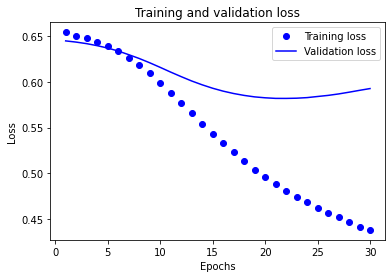

In [30]:
history_dict = history.history
history_dict.keys()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

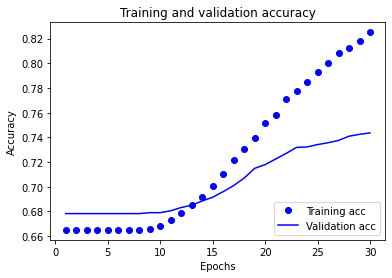

In [31]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [32]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

examples = [
  "MAGA TRUMP MAGA TRUMP WON",
  "JOE BIDEN JOE BIDEN VOTE BLUE NO MATTER WHO",
  "NIGGER NIGGER NIGGER NIGGER NIGGER NIGGER NIGGER NIGGER NIGGER NIGGER",
  "Nigger is an offensive and derogatory word that is used to insulf all people of color (not only afro-americans) ",
  "Love is good, I love everyone and wish you all the best things in life",
  "Believe in Jesus and he will believe in you",
  "Democracy is one of the most important aspect of every US cityzen's life",
  "TRUMP",
  "BIDEN",
  "#MAGA",
  "NIGGER JEW HOLOCAUST HITLER TRUMP PUTIN 9/11 ELECTION FRAUD  ALLAH",
  "NIGGER JEW HOLOCAUST HITLER TRUMP PUTIN 9/11 ELECTION FRAUD JESUS ALLAH Jesus Jesus",
]
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)
export_model.predict(examples)

27/27 [==============================] - 1s 8ms/step - loss: 0.4771 - accuracy: 0.7837
0.7837209105491638


array([[0.24264237],
       [0.39713567],
       [0.84177446],
       [0.2684738 ],
       [0.04982293],
       [0.44170934],
       [0.07323289],
       [0.27706003],
       [0.28648967],
       [0.27297127],
       [0.5402326 ],
       [0.7910484 ]], dtype=float32)

In [33]:
embedding_dim = 64
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.1),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.1),
  layers.Dense(1)
  ])

In [34]:
# for some reason, in the tutorial the threshold is 0.0, which, in my opinion, is too unfair
model.compile(loss=losses.BinaryCrossentropy
(from_logits=True,label_smoothing=0),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.5))
#(from_logits=False)

In [35]:


model.summary()
epochs = 30
historyB = model.fit(
    train_dsB,
    validation_data=val_dsB,
    epochs=epochs)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          640064    
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 64)          0         
_________________________________________________________________
global_average_pooling1d_5 ( (None, 64)                0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 640,129
Trainable params: 640,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
110/110 [==============================] - 4s 29ms/step - loss: 0.5268 - binary_accuracy: 0.8787 - val_

In [36]:
lossB, accuracyB = model.evaluate(test_dsB)

print("Loss: ", lossB)
print("Accuracy: ", accuracyB)

8/8 [==============================] - 0s 3ms/step - loss: 0.3001 - binary_accuracy: 0.8875
Loss:  0.3000640273094177
Accuracy:  0.887499988079071


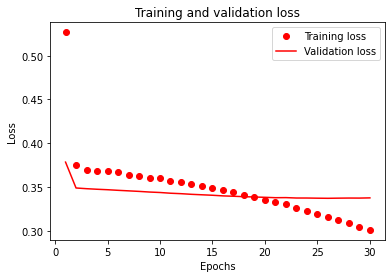

In [37]:
history_dictB = historyB.history
history_dictB.keys()
accB = history_dictB['binary_accuracy']
val_accB = history_dictB['val_binary_accuracy']
lossB = history_dictB['loss']
val_lossB = history_dictB['val_loss']

epochs = range(1, len(accB) + 1)

# "ro" is for "red dot"
plt.plot(epochs, lossB, 'ro', label='Training loss')
# r is for "solid blue line"
plt.plot(epochs, val_lossB, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

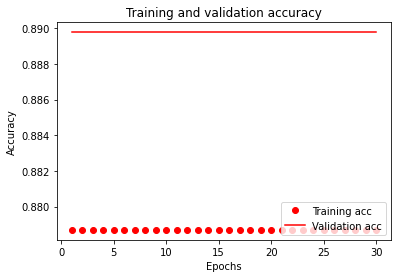

In [38]:
plt.plot(epochs, accB, 'ro', label='Training acc')
plt.plot(epochs, val_accB, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

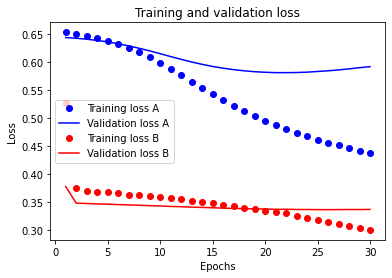

In [39]:
loss = history_dict['loss']
plt.plot(epochs, loss, 'bo', label='Training loss A')
plt.plot(epochs, val_loss, 'b', label='Validation loss A')
plt.plot(epochs, lossB, 'ro', label='Training loss B')
plt.plot(epochs, val_lossB, 'r', label='Validation loss B')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

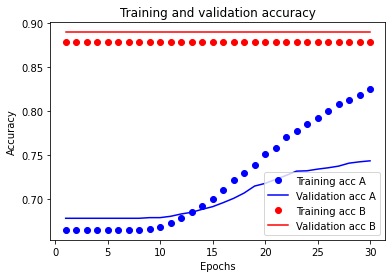

In [40]:
plt.plot(epochs, acc, 'bo', label='Training acc A')
plt.plot(epochs, val_acc, 'b', label='Validation acc A')
plt.plot(epochs, accB, 'ro', label='Training acc B')
plt.plot(epochs, val_accB, 'r', label='Validation acc B')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [41]:
export_modelB = tf.keras.Sequential([
  vectorize_layer,
  model,
  layers.Activation('sigmoid')
])

export_modelB.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

examples = [
  "You are a dumb retard, you are an asshole and you shoudl kill yourself, you are an idiot, you are a bigot",
  " dumb retard, an asshole and should kill oneself , an idiot, a bigot",
  "you are an IDIOT!",
  "IDIOT!",
  "You are the worst President in the hisotry of the US, I can't wait till you will be out of office. You are a nazi",
  "The worst   in the hisotry of the US, I can't wait till  will be out of office.  are a nazi",
  "You are like Hitler, dumb retarded nigger, KYS",
  "I am like Hitler, dumb retarded nigger, KYS",
  "He is like Hitler, dumb retarded nigger, KYS",
  "She is like Hitler, dumb retarded nigger, KYS",
  "Donald Trump is like Hitler, dumb retarded nigger, KYS",
  "Donald Trump is the worst Presiden in the history of the US",
  "Joe Biden is the worst Presiden in the history of the US",
  "Vladimir Putin is the worst Presiden in the history of Russia",
  "Donald Trump is the best President in the history of the US",
  " people,  white males are racists,  OF THEM, EVERY.SINGLE.ONE, they are bigots and dumb "
]
loss, accuracy = export_model.evaluate(raw_test_dsB)
print(accuracy)
export_modelB.predict(examples)

8/8 [==============================] - 0s 3ms/step - loss: 0.8702 - accuracy: 0.6167
0.6166666746139526


array([[0.05966979],
       [0.16915986],
       [0.1906769 ],
       [0.23382622],
       [0.04301471],
       [0.07321331],
       [0.16718039],
       [0.2297903 ],
       [0.15506902],
       [0.17446208],
       [0.14436722],
       [0.1076771 ],
       [0.13768905],
       [0.13649312],
       [0.11575702],
       [0.1382077 ]], dtype=float32)